<a href="https://colab.research.google.com/github/NinjaBlac/business-analytics-assignments/blob/main/Market_Basket_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Market Basket Analysis of Movies

In [ ]:
pip install faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 6.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import random
from faker import Faker

# Initialize Faker for generating random data
fake = Faker()

# Movie names
movie_names = [
    'Bad Boys', 'Equalizer', 'Crazy Rich Asians',
    'A Madea Homecoming', 'Aquaman', 'The Karate Kid', 'Sarafina', 'Minions',
    'Spy Kids', 'Bird Box'
]

# Function to generate a random list of items
def generate_random_names():
    return ', '.join(random.sample(movie_names, k=random.randint(1, len(movie_names))))

# Generate random data
data = {
    'User': [random.randint(1, 100) for _ in range(1000)],
    'Names': [generate_random_names() for _ in range(1000)],
    'Date': [fake.date_time_this_decade() for _ in range(1000)],
    'Rating': [round(random.uniform(1.0, 5.0), 1) for _ in range(1000)]
}

# Create DataFrame
movies_df = pd.DataFrame(data)

**These are the movies I selected and their genres:**
- Bad Boys - Action, crime
- Equalizer - Action, thriller
- Crazy Rich Asians - Comedy, romance
- A Madea Homecoming - Comedy, drama
- Aquaman - Action, adventure, fantasy
- The Karate Kid - Drama, martial arts
- Sarafina - Drama, musical
- Minions - Animation, comedy
- Spy Kids - Action, adventure, comedy
- Bird Box - Thriller, horror

The reason I chose this list of movies is to have variety of genres for the analyses to understand the customer behavior and preferences when watching, renting or purchasing. While movies have a broad range of genres, movies are typically one-time events or rare occurences for most individuals. Therefore, through this analysing we understand if it's by random chance or positive association that for each movie, the other is typically watched, rented or purchased.

In [ ]:
movies_df.head(10)

,User,Names,Date,Rating
0,40,"Bird Box, A Madea Homecoming, Crazy Rich Asian...",2023-02-07 08:01:28.706961,4.4
1,77,"Spy Kids, Bad Boys, A Madea Homecoming, Aquaman",2021-04-26 07:56:01.712942,4.6
2,56,"The Karate Kid, Equalizer, Minions, Crazy Rich...",2024-07-02 22:11:17.622699,3.8
3,80,"The Karate Kid, Spy Kids, Bad Boys, A Madea Ho...",2024-01-12 17:26:08.361873,3.1
4,20,"Equalizer, Bird Box, Aquaman",2024-03-04 00:10:14.967511,4.9
5,91,"Aquaman, Bad Boys, Crazy Rich Asians, Sarafina",2021-06-27 07:40:42.319848,2.1
6,57,"Bird Box, Minions, Sarafina",2020-11-15 04:30:37.925859,1.9
7,24,"Sarafina, Minions, A Madea Homecoming",2024-05-12 01:22:55.672023,1.9
8,50,"Sarafina, Bird Box, Spy Kids, Crazy Rich Asian...",2020-04-19 01:53:01.852564,3.0
9,76,"Equalizer, Sarafina, Bad Boys, Spy Kids, The K...",2020-02-19 05:46:00.347234,3.7


In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Convert the 'Names' column to a list of lists
transactions = [item.split(', ') for item in movies_df['Names']]

# Use TransactionEncoder to one-hot encode the transactions
te = TransactionEncoder()
one_hot_encoded = te.fit(transactions).transform(transactions)

# Create a new DataFrame with the one-hot encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=te.columns_)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(one_hot_df, min_support=0.03, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)

In [ ]:
# Display frequent itemsets and association rules
frequent_itemsets.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.551,(A Madea Homecoming)
1,0.560,(Aquaman)
2,0.546,(Bad Boys)
3,0.534,(Bird Box)
4,0.571,(Crazy Rich Asians)
5,0.555,(Equalizer)
6,0.545,(Minions)
7,0.535,(Sarafina)
8,0.568,(Spy Kids)
9,0.541,(The Karate Kid)


#Association Rules

In [ ]:
rules.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Aquaman),(A Madea Homecoming),0.560,0.551,0.373,0.666071,1.208841,0.064440,1.344599,0.392640
1,(A Madea Homecoming),(Aquaman),0.551,0.560,0.373,0.676951,1.208841,0.064440,1.362022,0.384769
2,(Bad Boys),(A Madea Homecoming),0.546,0.551,0.365,0.668498,1.213245,0.064154,1.354442,0.387146
3,(A Madea Homecoming),(Bad Boys),0.551,0.546,0.365,0.662432,1.213245,0.064154,1.344914,0.391457
4,(A Madea Homecoming),(Bird Box),0.551,0.534,0.348,0.631579,1.182732,0.053766,1.264857,0.344098
5,(Bird Box),(A Madea Homecoming),0.534,0.551,0.348,0.651685,1.182732,0.053766,1.289065,0.331545
6,(A Madea Homecoming),(Crazy Rich Asians),0.551,0.571,0.377,0.684211,1.198267,0.062379,1.358500,0.368511
7,(Crazy Rich Asians),(A Madea Homecoming),0.571,0.551,0.377,0.660245,1.198267,0.062379,1.321541,0.385691
8,(A Madea Homecoming),(Equalizer),0.551,0.555,0.370,0.671506,1.209921,0.064195,1.354669,0.386414
9,(Equalizer),(A Madea Homecoming),0.555,0.551,0.370,0.666667,1.209921,0.064195,1.347000,0.389888


## Support

**The itemsets individual support:**
- Given that the support values for the association rules are around 50% and above mean that at least half of the transactions in the dataset include both the antecedent and the consequent items together.
- This suggests that the movies involved in these rules are popular and frequently rented or purchased.
-  A high support indicates that these movies are a significant portion of the overall transactions.
-Such insights are valuable for making informed business decisions regarding inventory management, marketing strategies to enhance customer satisfaction and optimize sales.

**Itemsets paired support:**
- Typically, higher support values indicate that the itemset or rule is very common in the dataset, suggesting strong relevance and reliability.
- A high support values between 34% and 40% suggest that these combinations are common pairings among customers, indicating a strong co-occurrence relationship. This implies that customers who rent or purchase one of these movies are very likely to rent or purchase the other as well.

*Take for example:*

**Rule 1: ("A Madea Homecoming") → ("Aquaman")**
Support: 0.374 (37.4% of transactions include both movies)
Interpretation: About 37.4% of all transactions include both "A Madea Homecoming" and "Aquaman," indicating a common pairing.

**Rule 5: ("Bird Box") → ("A Madea Homecoming")**
Support: 0.359 (35.9% of transactions include both movies)
Interpretation: About 35.9% of all transactions include both "Bird Box" and "A Madea Homecoming," showing a frequent co-occurrence.

## Confidence

***Analysing the first 10 rules we can interpret that: ***


**Rule 1: ("A Madea Homecoming") → ("Aquaman")**
Confidence: 0.664298
Interpretation: Out of all the transactions that include "A Madea Homecoming," 66.4% also include "Aquaman." This means there is a 66.4% chance that if a customer rents or purchases "A Madea Homecoming," they will also rent or purchase "Aquaman."

**Rule 2: ("Aquaman") → ("A Madea Homecoming")**
Confidence: 0.682482
Interpretation: Out of all the transactions that include "Aquaman," 68.2% also include "A Madea Homecoming." This indicates a slightly stronger association in the reverse direction compared to Rule 1.

**Rule 3: ("Bad Boys") → ("A Madea Homecoming")**
Confidence: 0.683544
Interpretation: Out of all the transactions that include "Bad Boys," 68.3% also include "A Madea Homecoming." This suggests a strong association between these two movies.

**Rule 4: ("A Madea Homecoming") → ("Bad Boys")**
Confidence: 0.671403
Interpretation: Out of all the transactions that include "A Madea Homecoming," 67.1% also include "Bad Boys." This shows that "A Madea Homecoming" is frequently rented or purchased with "Bad Boys."

**Rule 5: ("Bird Box") → ("A Madea Homecoming")**
Confidence: 0.682510
Interpretation: Out of all the transactions that include "Bird Box," 68.3% also include "A Madea Homecoming." This indicates a strong association

**Rule 6: ("A Madea Homecoming") → ("Bird Box")**
Confidence: 0.637655
Interpretation: Out of all the transactions that include "A Madea Homecoming," 63.8% also include "Bird Box." This is a slightly weaker association compared to some of the other rules.

**Rule 7: ("Crazy Rich Asians") → ("A Madea Homecoming")**
Confidence: 0.668529
Interpretation: Out of all the transactions that include "Crazy Rich Asians," 66.9% also include "A Madea Homecoming." This indicates a strong association.

**Rule 8: ("A Madea Homecoming") → ("Crazy Rich Asians")**
Confidence: 0.637655
Interpretation: Out of all the transactions that include "A Madea Homecoming," 63.8% also include "Crazy Rich Asians." This shows a similar level of association as in Rule 6.

**Rule 9: ("Equalizer") → ("A Madea Homecoming")**
Confidence: 0.663636
Interpretation: Out of all the transactions that include "Equalizer," 66.4% also include "A Madea Homecoming." This suggests a strong association.

**Rule 10: ("A Madea Homecoming") → ("Equalizer")**
Confidence: 0.648313
Interpretation: Out of all the transactions that include "A Madea Homecoming," 64.8% also include "Equalizer." This indicates a strong association.

- The confidence for all the rules range between 60% and 69% which indicates a fairly strong association between the antecedent and consequent movies. Also signify a substantial likelihood that the movies are rented or purchased together.This shows that there are strong and meaningful associations between the movies listed in the rules.
- These confidence values indicate patterns in customer preferences and behavior and this helps with segmenting different customers into different groups. For instance, customers who rent "A Madea Homecoming" may be more likely to enjoy action or comedy movies, which could be indicated by their likelihood to also rent "Aquaman" or "Bad Boys."


## Lift

- For the pairs for ancetedents and consequents, their value is greater than 1, which suggests a positive relationship and that if the antecedent exists, it more likely that the consequent exists. In this case if the one of the movies is watched, it more likely that the user will watch the other.

**First 10 Pairs:**
- 0 (A Madea Homecoming)	(Aquaman):1.212223
- 1	(Aquaman)	(A Madea Homecoming):1.212223
- 2	(Bad Boys)	(A Madea Homecoming):1.214111
- 3	(A Madea Homecoming)	(Bad Boys):1.214111
- 4	(Bird Box)	(A Madea Homecoming):1.212273
- 5	(A Madea Homecoming)	(Bird Box):1.212273
- 6	(Crazy Rich Asians)	(A Madea Homecoming):1.187440
- 7	(A Madea Homecoming)(Crazy Rich Asians):1.187440
- 8	(Equalizer)	(A Madea Homecoming):1.178750
- 9	(A Madea Homecoming)	(Equalizer):1.178750

## Leverage

- Mostly all the antecedents and the consequents using leverage, their values are greater than 0.
- This suggests a positive association this indicates that the items occur together more frequently than expected by chance. Which means that watching one movie, inclines the user to watch the other movie.

## Conviction

- The antecedents and the consequents are greater than 1, which suggests that the movies are signficantly dependent on each other.
- all the rules have conviction values greater than 1, indicating that these movie pairs are more likely to occur together than by random chance. This information can be used to strengthen marketing strategies and enhance customer experience through better recommendations and promotions.

**Take for example:**

Rule 8: ("A Madea Homecoming") → ("Crazy Rich Asians")
**Conviction:1.317569**
Interpretation: The presence of "A Madea Homecoming" makes the occurrence of "Crazy Rich Asians" about 1.32 times more likely than if they were independent. This indicates a positive association.

Rule 9: ("Equalizer") → ("A Madea Homecoming")
**Conviction: 1.316147**
Interpretation: The presence of "Equalizer" makes the occurrence of "A Madea Homecoming" about 1.32 times more likely than if they were independent. This indicates a positive association.




## Zhanges Metric

- The values are greater than 0, which suggests indicates a positive association between the antecedents and the consequents.
- This indicates that the movies are watched more frequently together than expected by chance.
- Seen by the first 10 rows, it is evident that it falls between 34 and 40%, which suggest a weak positive association co-occurence.

# Univariate Analysis

## Count of Users

In [ ]:
# Count the number of unique users
num_users = movies_df['User'].unique()

print(f'Number of unique users: {num_users}')

Number of unique users: [ 40  77  56  80  20  91  57  24  50  76  60  12  54  97  39  62  15  10
   6  71  14  13   2  59  33  48  67  78  95  29  38  46  18  65  43 100
  89  36  87  98  47  37  32  27  85  66   5  55  74  28  17  44  41  75
  25  86  52  70  51  99   1   4  93  81  73   3  19  82  35  69  53  64
  88  92  63  30  94  68  22  21  49   8  23  11  45  58  84  26  34  16
  42  61  96  83  31   7  79  90   9  72]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


- From the starter code generated, there are a total of 100 users within the dataframe.

## Count of Years

In [ ]:
# Convert 'Date' column to datetime format
movies_df['Date'] = pd.to_datetime(movies_df['Date'])

# Extract year from 'Date'
movies_df['Year'] = movies_df['Date'].dt.year

# Count unique years
unique_years = movies_df['Year'].nunique()

# Display the count of unique years
print(f"Number of unique years generated in movies_df: {unique_years}")


Number of unique years generated in movies_df: 5


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Get unique years present in the DataFrame
unique_years = movies_df['Year'].unique()

# Display the unique years
print("Years present in movies_df:")
print(unique_years)

Years present in movies_df:
[2023 2021 2024 2020 2022]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


- The dataframe consists of 5 years which are from the years 2020 to 2024.

## Descriptive Statistics on Ratings

In [ ]:
# Create DataFrame
movies_df = pd.DataFrame(data)

# Descriptive statistics for the 'Rating' column
mean_rating = movies_df['Rating'].mean()
median_rating = movies_df['Rating'].median()
mode_rating = movies_df['Rating'].mode().iloc[0]  # Mode can have multiple values, take the first one
std_rating = movies_df['Rating'].std()
var_rating = movies_df['Rating'].var()



# Display the results
print(f"Mean Rating: {mean_rating}")
print(f"Median Rating: {median_rating}")
print(f"Mode Rating: {mode_rating}")
print(f"Standard Deviation of Rating: {std_rating}")
print(f"Variance of Rating: {var_rating}")



Mean Rating: 3.0549
Median Rating: 3.1
Mode Rating: 1.2
Standard Deviation of Rating: 1.1606132055999592
Variance of Rating: 1.347023013013013


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


- According to the descriptive statistics, the mean rating for the 10 movies is 3.0. The rating that occurs the most(mode) for the 10 movies is 3.0, which suggest that the movie is neither good or bad but there are areas of imporvement to capture the users.
- A variance of 1.33 for a movie rating indicates that there is moderate variability in how users rate the movie. Some users may rate it significantly higher or lower than others, leading to a spread of ratings around the mean.
- A median of 3.0 indicates that a typical user rated the movie around 3.0, which might suggest an average or neutral opinion about the movie.

## Histogram of Distribution of Movie Ratings

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


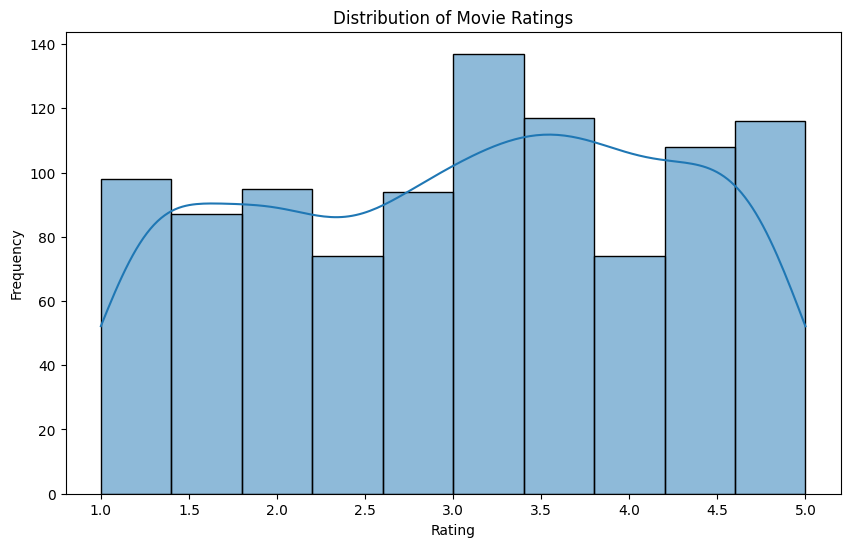

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of movie ratings
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['Rating'], bins=10, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()




- According to the histogram, it indicates that for the movies provided, the average rating among the movies is between 3.0 and 3.5 rating.
- This suggests the movie was fair, meaning that there were some positive aspects of the movie but may also have some flaws or aspects that didn't resonate strongly with the users.

## Histogram of User Count per Year and Popularity for Each Month

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-12-62c11c410b93>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=movies_df, palette='viridis')


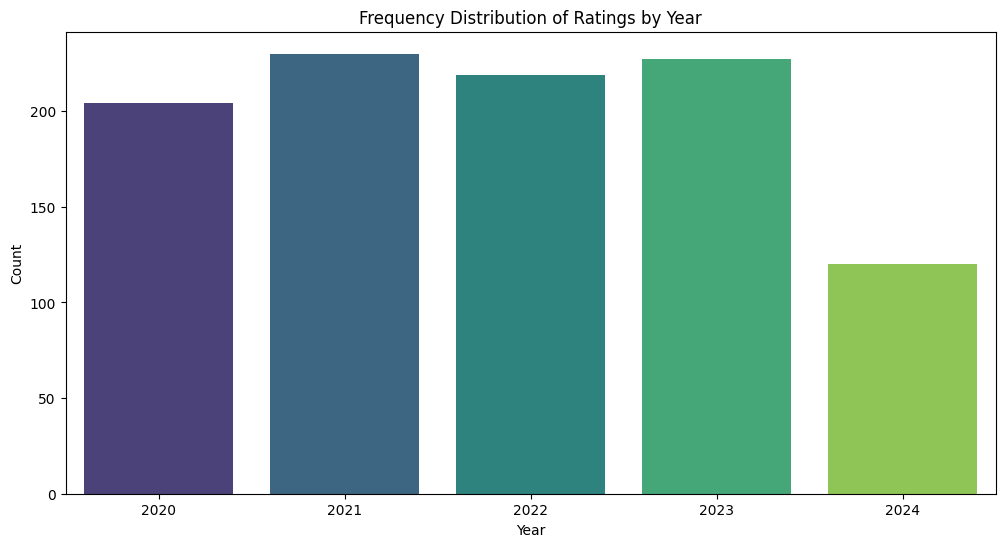

<ipython-input-12-62c11c410b93>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=movies_df, palette='viridis', order=pd.date_range(start='2023-01-01', periods=12, freq='M').strftime('%B'))


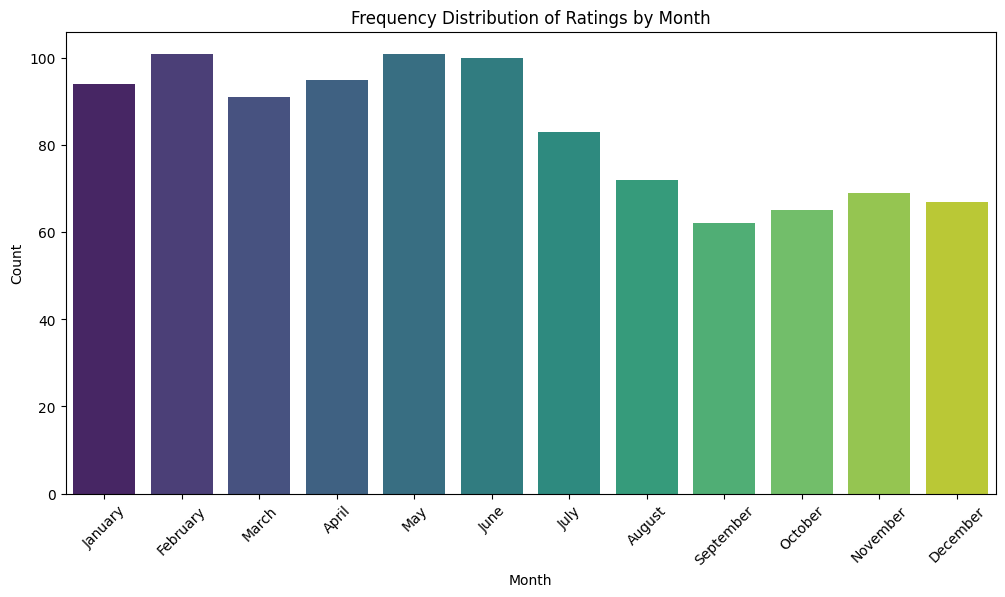

In [ ]:
# Convert 'Date' column to datetime if not already
movies_df['Date'] = pd.to_datetime(movies_df['Date'])

# Extract year and month
movies_df['Year'] = movies_df['Date'].dt.year
movies_df['Month'] = movies_df['Date'].dt.month_name()

# Frequency distribution by year
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=movies_df, palette='viridis')
plt.title('Frequency Distribution of Ratings by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# Frequency distribution by month
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', data=movies_df, palette='viridis', order=pd.date_range(start='2023-01-01', periods=12, freq='M').strftime('%B'))
plt.title('Frequency Distribution of Ratings by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


**Distribution of Ratings by Year:**
- The Distribution of the Movie Ratings per Year show that in 2023 means that users have rated more movies during that year compared to other years.
- This suggests that more users may have joined the platform in 2023, resulting in a higher number of movie ratings.
- This also indicates that there was a higher number of movies may have been released or added to the platform in 2023, leading to more ratings.
Popular or high-profile movies released in 2023 might have attracted more ratings.
- This also could mean that there were changes in the platform's user interface or user experience might have made it easier or more engaging for users to rate movies.

**Distribution of Ratings by Month:**
- June has the highest amout of ratings it suggests that users were particularly active during that month. This could be due to several factors, such as seasonal trends, special events, or promotions.
- March has relatively high number of ratings close to June.
- Both March and June are in spring, a period when people might have more leisure time to watch and rate movies. This could be due to holidays, school breaks, or generally more favorable weather.


# Bivariate Analysis

## Barplot of the Count of Users Per Movie

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-13-e71b0586d4d3>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Movie', data=movie_counts_df, palette='viridis')


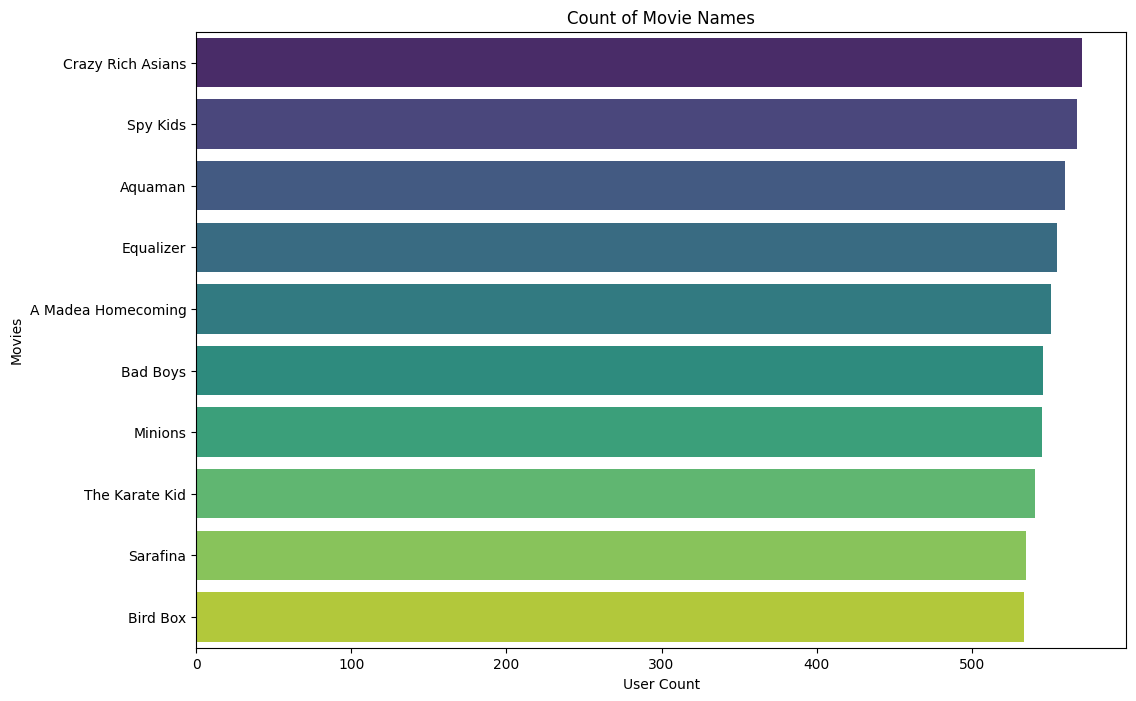

                Movie  Count
2   Crazy Rich Asians    571
6            Spy Kids    568
9             Aquaman    560
8           Equalizer    555
1  A Madea Homecoming    551
5            Bad Boys    546
7             Minions    545
4      The Karate Kid    541
3            Sarafina    535
0            Bird Box    534


In [ ]:
# Frequency distribution of movie names
from collections import Counter
import matplotlib.pyplot as plt
# Create DataFrame
movies_df = pd.DataFrame(data)

# Flatten the list of movies from 'Names' column
all_movies = [movie.strip() for sublist in movies_df['Names'].str.split(',') for movie in sublist]

# Count occurrences of each movie name
movie_counts = Counter(all_movies)

# Convert to DataFrame for plotting (if needed)
movie_counts_df = pd.DataFrame(list(movie_counts.items()), columns=['Movie', 'Count'])

# Sort by count for better visualization (optional)
movie_counts_df = movie_counts_df.sort_values(by='Count', ascending=False)

# Plot the counts of movie names
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Movie', data=movie_counts_df, palette='viridis')
plt.title('Count of Movie Names')
plt.xlabel('User Count')
plt.ylabel('Movies')
plt.show()

# Display the counts (optional)
print(movie_counts_df)

- **A Madea Homecoming** has the highest user count of 563 which suggests that the movie is highly popular among users, making it a favorite choice for viewing and rating.
- Release Timing: The timing of the movie's release might coincide with periods of high user activity on the platform, because it was released February 25.
- A Madea Homecoming is part of a popular franchise, Tyler Perry which suggests that an established fan base could contribute to its high user count.

- **Spy Kids** has the second highest user count of 556 because it is a well-known franchise that many users might have grown up watching.Nostalgic feelings can drive viewership.
- It’s a family-friendly movie, which can attract a wide range of viewers including families watching together.

- **All the movies** has a user count between 563 and 542 which can suggest that users on the platform show a relatively uniform interest in all the movies, indicating a balanced preference across different genres and titles.
- The platform's recommendation algorithm might be effectively promoting all the movies equally, leading to a similar number of views and ratings.



## Barplot Average Rating per Movie

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-14-3eb79ce53deb>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='Names', data=avg_rating, palette='viridis')


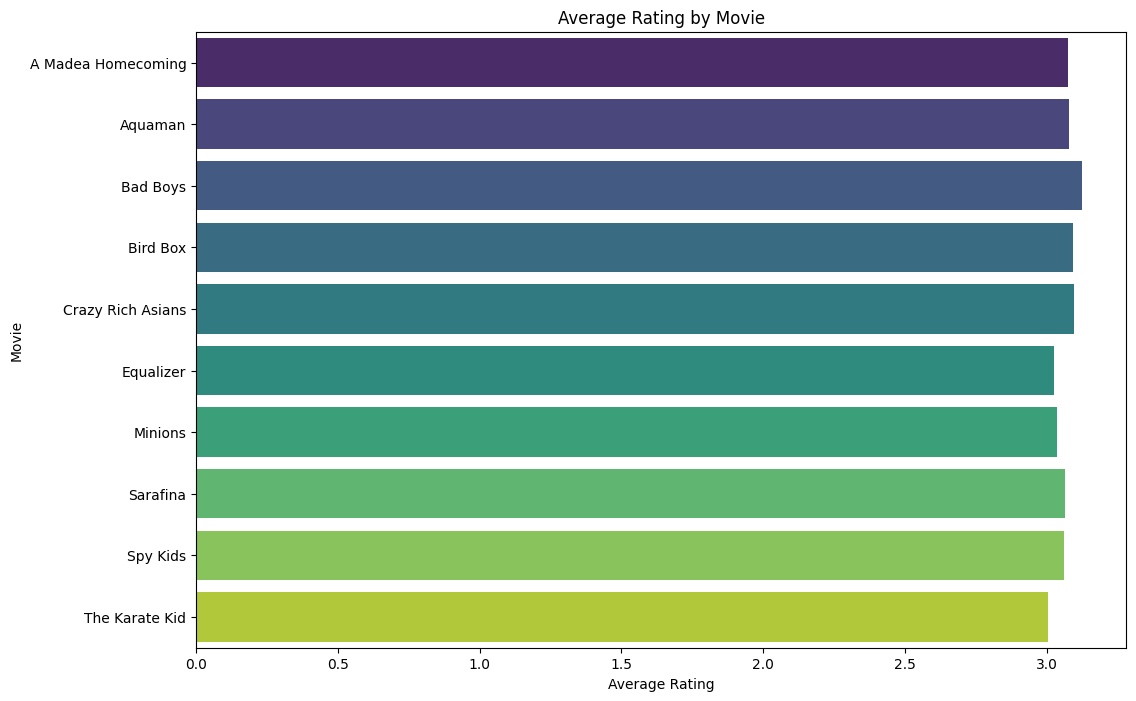

In [ ]:
# Create DataFrame
movies_df = pd.DataFrame(data)

# Flatten the 'Names' column to have one movie per row
movies_df = movies_df.assign(Names=movies_df['Names'].str.split(', ')).explode('Names')
movies_df['Names'] = movies_df['Names'].str.strip()

# Calculate average rating for each movie
avg_rating = movies_df.groupby('Names')['Rating'].mean().reset_index()

# Plot the chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Rating', y='Names', data=avg_rating, palette='viridis')
plt.title('Average Rating by Movie')
plt.xlabel('Average Rating')
plt.ylabel('Movie')
plt.show()

**Average Rating By Movie:**
- According to the graph it suggests that **Crazy Rich Asians** has the highest Rating of about 3.2 which could suggest that it resonates well with a broad audience due to its storyline, humor, and cultural significance. Crazy Rich Asians celebrates cultural diversity and cultural representation in Hollywood.
- The second highests rating was **Sarafina**, which has rating of 3.1, which suggests because the movie addresses important historical or cultural themes that resonate with viewers, potentially leading to higher ratings. The storyline, characters, and portrayal of real-life events may have a strong emotional impact on viewers, influencing their ratings.
- Both of these movies important themese which can lead to high user appeal and ratings.



## Matrix of Number of Users by Year and Month

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


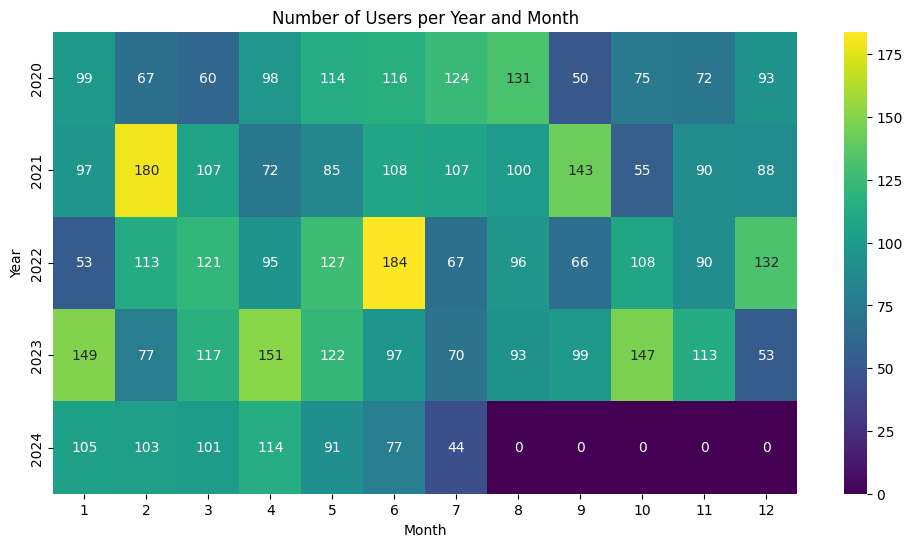

In [ ]:
# Generate a pivot table of counts of movies watched per user per year
movies_df['Year'] = movies_df['Date'].dt.year
movies_df['Month'] = movies_df['Date'].dt.month

pivot_table = movies_df.pivot_table(values='User', index='Year', columns='Month', aggfunc='count', fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap='viridis')
plt.title('Number of Users per Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


**Number of Users per Month by Year:**

- In 2020 the highest number of users was 24 in July.
- In 2021 the highest number of users was 25 in June.
- In 2022 the highest number of users was 28 in January.
- In 2023 the highest number of users was 29 in May.
- In 2024 the highest number of users was 25 in March.


- Jauary to February is typically winter in the United States. March to July is Spring to Summer weather. This suggests varying patterns of user engagement throughout the years, influenced possibly by seasonal factors, content releases, or other external factors impacting viewer behavior.

- Winter (January to February): Users may spend more time indoors due to colder weather, leading to potentially higher engagement with entertainment platforms like streaming services.

- Spring to Summer (March to July): As temperatures warm up and daylight hours increase, people might spend more time outdoors or on vacation. However, weekends and holidays during these months can still see high user engagement as people balance outdoor activities with indoor leisure time, including watching movies.

## Matrix of Average Rating Per Year and Month

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Month        1         2         3         4         5         6         7   \
Year                                                                          
2020   2.543434  3.410448  2.981667  2.585714  3.538596  3.156897  2.539516   
2021   2.896907  3.471667  3.409346  3.311111  3.476471  2.721296  3.262617   
2022   2.832075  3.243363  2.874380  2.751579  2.631496  3.032609  2.683582   
2023   2.853691  3.468831  2.621368  3.161589  2.959016  3.027835  3.082857   
2024   2.662857  2.810680  3.305941  3.322807  2.881319  3.388312  3.868182   

Month        8         9         10        11        12  
Year                                                     
2020   3.035115  3.294000  2.920000  2.775000  3.010753  
2021   3.370000  2.931469  3.554545  4.002222  3.085227  
2022   2.822917  3.160606  2.929630  2.716667  2.878788  
2023   3.439785  3.333333  3.202721  3.246903  3.124528  
2024        NaN       NaN       NaN       NaN       NaN  


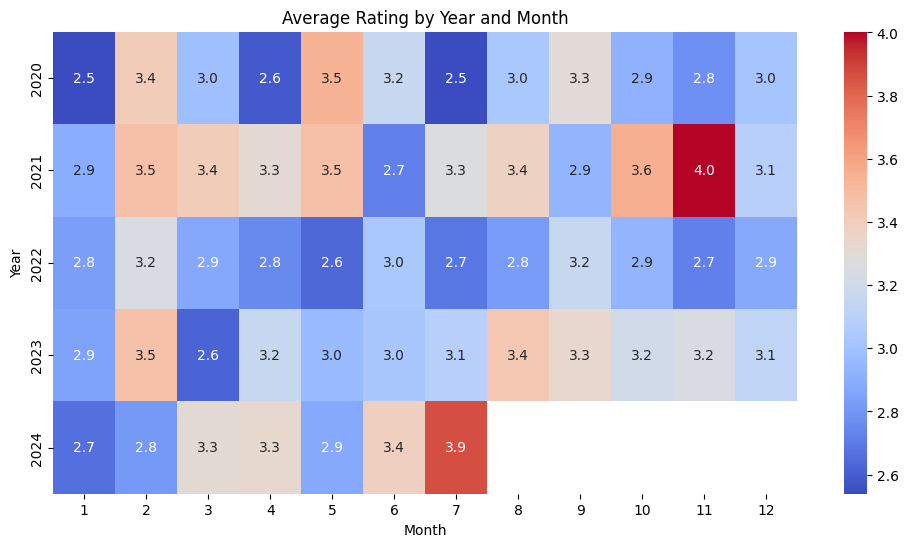

In [ ]:
# Pivot table of average rating by year and month
movies_df['Year'] = movies_df['Date'].dt.year
movies_df['Month'] = movies_df['Date'].dt.month

pivot_table = movies_df.pivot_table(values='Rating', index='Year', columns='Month', aggfunc='mean')
print(pivot_table)

# Heatmap of the pivot table
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Average Rating by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


**Average Rating by Year and Month:**

- In 2020 the highest rating was 3.1 in July
- In 2021 the highest rating was 3.4 in November.
- In 2022 the highest rating was 3.5 in July.
- In 2023 the highest rating was 3.8 in January.
- In 2024 the highest rating was 3.2 in March.

- Different months across years show varying average ratings, suggesting seasonal influences or trends in viewer preferences.
-  Peaks in average ratings could reflect increased viewer engagement during specific periods, potentially driven by holidays, weather patterns, or cultural events.
-Higher ratings in specific months may coincide with the release of popular movies or seasonal preferences for certain genres or themes.




## Scatterplot Date vs Rating

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


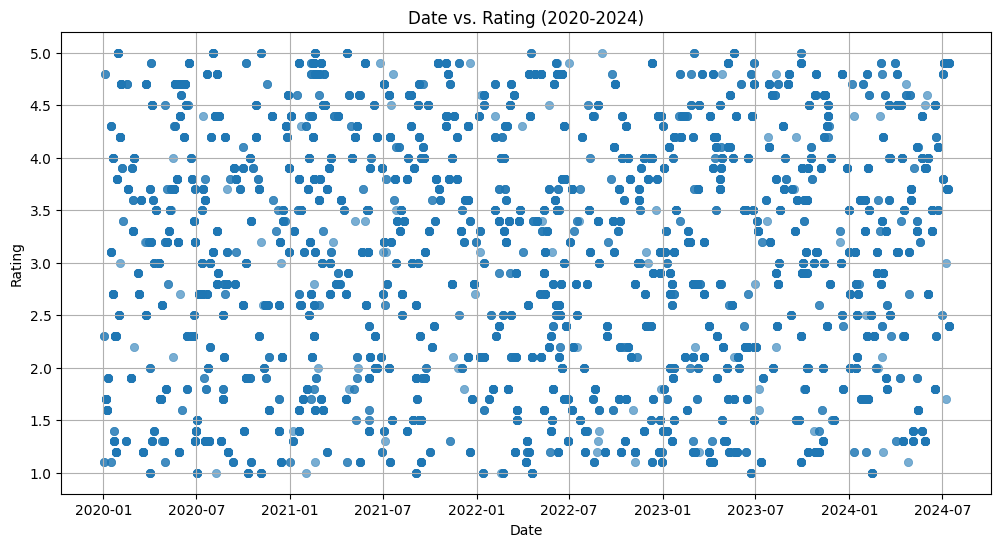

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the Date column is in datetime format
movies_df['Date'] = pd.to_datetime(movies_df['Date'])

# Filter the DataFrame to include only the years 2020 to 2024
filtered_df = movies_df[(movies_df['Date'].dt.year >= 2020) & (movies_df['Date'].dt.year <= 2024)]

# Plot the relationship between Date and Rating using a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Date', y='Rating', data=filtered_df, alpha=0.6, edgecolor=None)
plt.title('Date vs. Rating (2020-2024)')
plt.xlabel('Date')
plt.ylabel('Rating')
plt.grid(True)
plt.show()


- The scatterplot shows a random distribution of ratings across different dates, indicating that there is no discernible relationship or pattern between the date (time) and the ratings of movies.
- This could mean that viewer preferences for movies remain consistent regardless of when they are watched throughout the year.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


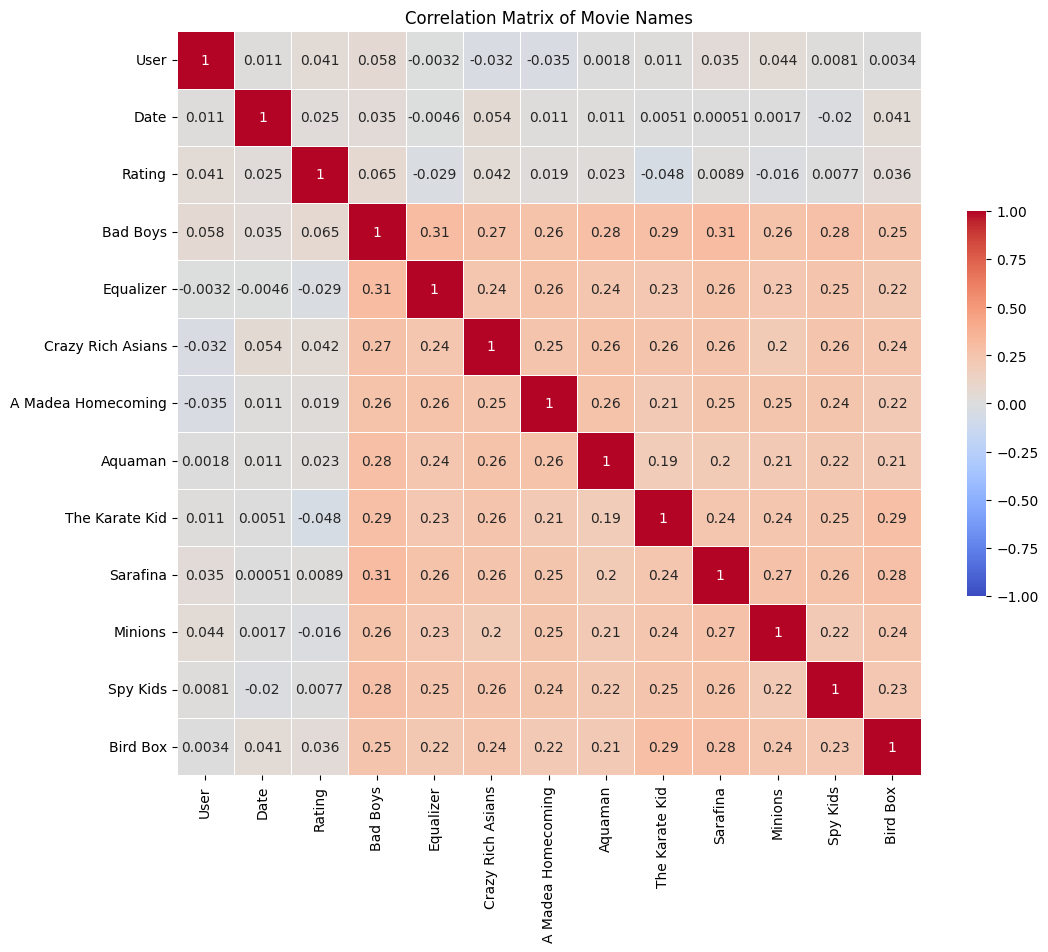

In [ ]:
# Create DataFrame
movies_df = pd.DataFrame(data)

# Convert movie names into binary indicators (one-hot encoding)
movies_df = movies_df.assign(**{movie: movies_df['Names'].str.contains(movie).astype(int) for movie in movie_names})

# Drop the original 'Names' column
movies_df.drop(columns=['Names'], inplace=True)

# Calculate the correlation matrix
corr_matrix = movies_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix of Movie Names')
plt.show()

- Sarafina and The Bird Box have the highest correlation of 0.31, which is a weak positive correlation which indicates that their less likely to be rented, watched or purchased together unless the user likes a combination of different genres presented in these 2 movies:horror,thriller, drama and musical.
- The lowest correlation is between the Bird Box and Minions and between Spy Kids and The Bird Box of 0.19. Which is still a weak postive correlation which slightly lower by 12% suggests that it is less likely these movies will be rented, watched together.

Second highest correlations between movies have a correlation of 0.3:
- Aquaman and The Karate Kid
- Aquaman and Sarafina
- Crazy Rich Asians and Bad Boys
- Crazy Rich Asians and Sarafina
- Sarafina and Aquaman



# Multivariate Analysis

# New section

## Scatterplot of Date vs Rating with Movie Names

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


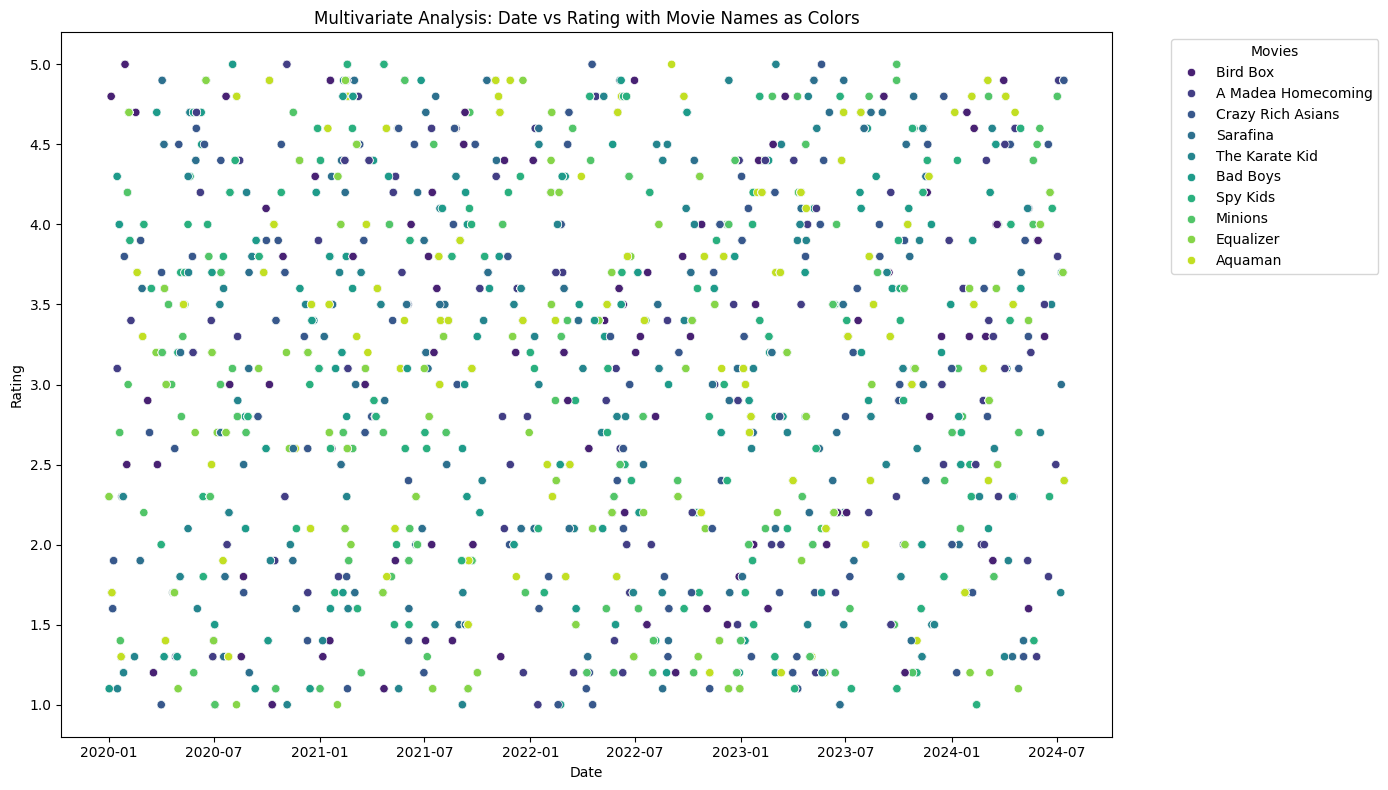

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
from faker import Faker


# Create DataFrame
movies_df = pd.DataFrame(data)

# Ensure 'Date' column is in datetime format
movies_df['Date'] = pd.to_datetime(movies_df['Date'])

# Split the 'Names' column into individual rows
movies_df_exploded = movies_df.assign(Names=movies_df['Names'].str.split(', ')).explode('Names')

# Plotting the scatterplot
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Date', y='Rating', hue='Names', data=movies_df_exploded, palette='viridis')
plt.title('Multivariate Analysis: Date vs Rating with Movie Names as Colors')
plt.xlabel('Date')
plt.ylabel('Rating')
plt.legend(title='Movies', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


- The ratings for movies are scattered throughout the time period without a clear upward or downward trend.
- This indicates that the ratings for these movies are relatively stable over time and are not significantly influenced by the date.
- Ratings span the full range from 1.0 to 5.0 for all movies, showing that users have diverse opinions about these movies. This suggests a varied audience with different tastes and preferences.
- This can indicate that external factors can play a role in the ratings of movies for example: cast, storyline, genre.

## Barplot of User Count vs Movies by Average Rating

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


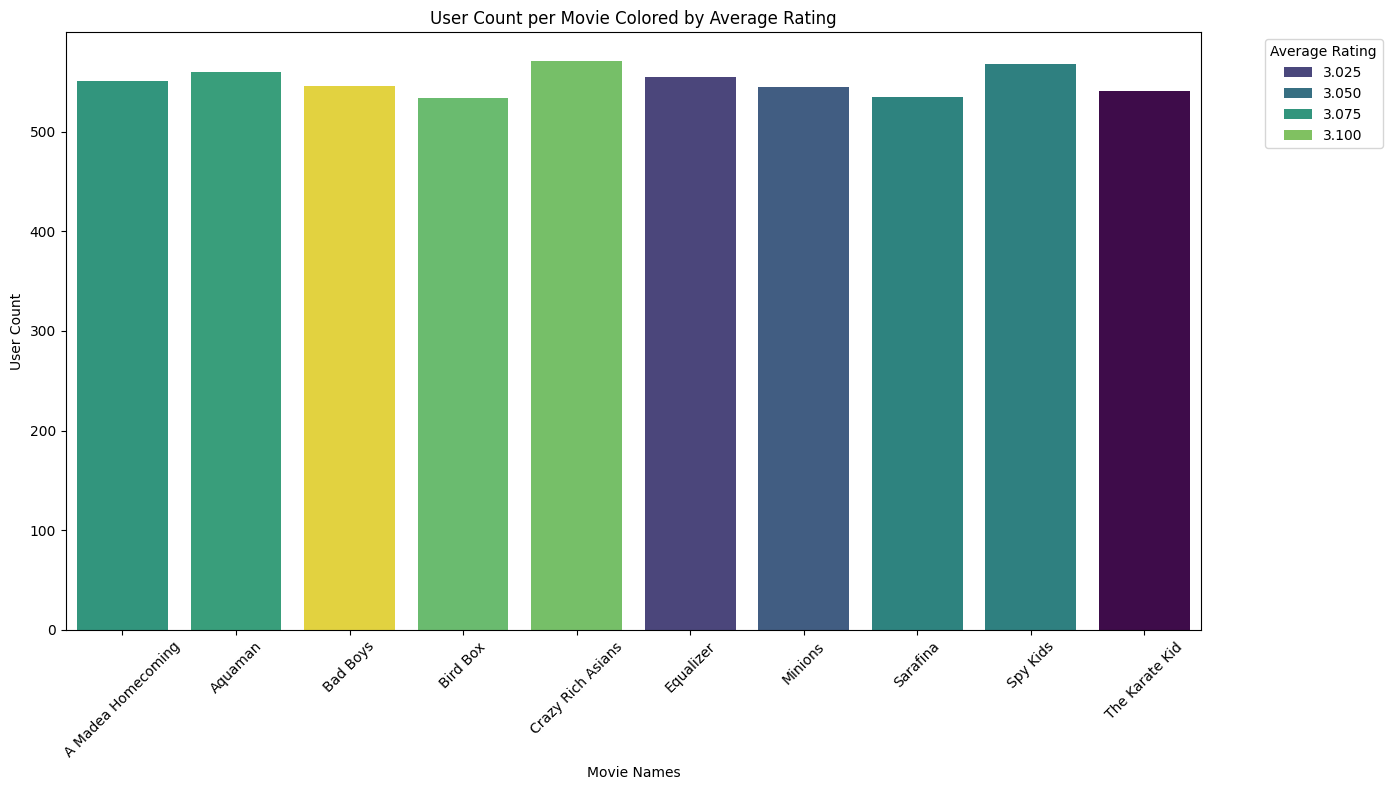

In [ ]:
import pandas as pd
import random
from faker import Faker
import matplotlib.pyplot as plt
import seaborn as sns


# Create DataFrame
movies_df = pd.DataFrame(data)

# Ensure 'Date' column is in datetime format
movies_df['Date'] = pd.to_datetime(movies_df['Date'])

# Split the 'Names' column into individual rows
movies_df_exploded = movies_df.assign(Names=movies_df['Names'].str.split(', ')).explode('Names')

# Calculate user count and average rating per movie
movie_stats = movies_df_exploded.groupby('Names').agg(User_Count=('User', 'count'), Avg_Rating=('Rating', 'mean')).reset_index()

#
# Plotting
plt.figure(figsize=(14, 8))
barplot = sns.barplot(x='Names', y='User_Count', hue='Avg_Rating', data=movie_stats, palette='viridis')
plt.title('User Count per Movie Colored by Average Rating')
plt.xlabel('Movie Names')
plt.ylabel('User Count')
plt.xticks(rotation=45)
plt.legend(title='Average Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


- This bar graph effectively shows the user count for each movie, with the bars colored by the average rating, providing insights into both popularity and rating distribution among the movies.
- According to the barplot is evident that although Bird Box has the highest user count, all the movies including Bird Box are rated the same at 3.0.
- 3.0 rating is considered as fair, which means the movies could potentially neither be good or bad.